# Introduction to Deep Learning


**What the session is about:**
1. Give an introduction to DL / ANN to get you started with them.
2. Won't be focussing on maths behind it!
3. Focus more on the coding aspect of it.

**What do we expect:**
1. Go back and try to run this notebook by yourself.
2. Play with this notebook --- tweak things here and there.
3. Get acquainted with the syntax and libraries.
4. See a little bit of theory to get better understanding.

### This notebook contains two tasks highlighted as [TODO::] in cells 7 and 13. You have to do those tasks and come up with the best model which gives the highest accuracy on the test data. Create a pull request(PR) on the repository (https://github.com/NippunSharma/MLSessions). Name of the PR should be "Name_RollNumber_ANN".


### Building block:- Perceptron

- Computation unit. **Input --> Computation --> Output**
- Weights are the learnable parameters.
- Weights determine importance of input signal in the output signal.

<img src="perceptron.png" alt="drawing" width="500"/>

### ANN

- Stacking a bunch of perceptrons.
- Input Layer, Hidden Layer, Output Layer
- Hidden Layer --- Extracted features.

<img src="ann.png" alt="drawing" width="300"/>

### DNN

- ANN with lots of hidden layers.

<img src="deep_nn.jpg" alt="drawing" width="600"/>

1. Image of George Washington given as input.
2. Hidden layers extract relevant info from input (features).
3. Output layers classifies who the person is.

## Fun part --- Coding !!

**Steps in the whole pipeline:**
1. Load and explore the data.
2. Data Preprocessing
3. Build model
4. Analyze model and Build it again! (Tweak the hyperparameters to get the best model.)
5. Again build the model! (Repeat until you get the best model.)
6. Make predictions

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


### Fashion MNIST

- A dataset containing images of clothing items.
- Classification task --- 10 classes.


### Data Exploration

In [2]:
## Loading the data
## (It will download the data when running for the first time.)
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
dict_class={}
for i in range(10):
    dict_class[i]=class_names[i]
dict_class

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
## Overview of dataset.

print("Shape of training data:", train_images.shape)
print("\nNumber of training images:", len(train_labels))
print("\nNumber of testing images", len(test_labels))
print("\nShape of one image:", train_images[0].shape)

Shape of training data: (60000, 28, 28)

Number of training images: 60000

Number of testing images 10000

Shape of one image: (28, 28)


In [7]:
## Number of images in training data for each category.
import pandas as pd
pd.Series(train_labels).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

### Data Preprocessing

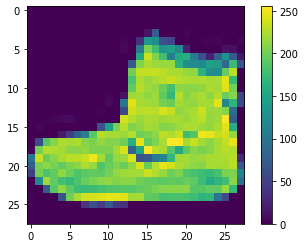

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [135]:
## Scaling the values between [0, 1]

## This slightly helps in faster convergence and better accuracy.
## [TODO]:: Try training without this scaling and compare the performance.

train_images = train_images / 255.0
test_images = test_images / 255.0

# train_images = train_images # training time increases slightly,decrease(not very significant) in test accuracy
# test_images = test_images

### Build Model

1. Define the model.
2. Compile it --- specify Loss function, optimizer, evaluation metrics
3. Train the model.

In [19]:
## 1. Defining the model.

model = tf.keras.Sequential([
    ## Flatten the input image from 2D into 1D. (Input Layer)
    ## Input shape based on the dataset image.
    ## All images must be of same shape!!!
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    ## Hidden Layer
    tf.keras.layers.Dense(128, activation='relu'),
    ## Output layer --- size = number of classes = 10
    ## Softmax activation function gives the probability of each class
    tf.keras.layers.Dense(10, activation='softmax')
])

## Activation function is a non linear function which is applied to each layer in the network.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
## 2. Compile the model.

model.compile(optimizer='adam',  # Optimizer --- an algorithm which tries to learn weights of the network.
              # Loss --- measures the error in prediction.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # Metric --- calculates how good the model is performing.
              metrics=['accuracy'])

In [21]:
## 3. Training the model.

## Epochs is the number of passes the model takes over the dataset.
## History object stores all the information about the model
history = model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 2s 787us/step - loss: 0.6339 - accuracy: 0.7804
Epoch 2/2
1875/1875 [==============================] - 2s 843us/step - loss: 0.3852 - accuracy: 0.8633


**The above accuracy is the accuracy on training data which the model has already seen.**

### Analyze Model (Very Very Imp.)

<pre><strong>Key Question to ask:     What to do once a model is trained??</strong></pre>

- Check accuracy / loss or any other metric.
- Check Generalizability of model (performance on test data)
- Bias / Variance Tradeoff

<br>
<br>

Bias = 100 - train_acc

Variance = train_acc - test_acc

|               | Train Acc High         | Train Acc Low                      |
|---------------|------------------------|------------------------------------|
| Test High Acc | Low bias, Low var      | High bias, High var (not possible) |
| Test Low Acc  | Low bias, High var     | High bias, Low var                 |



Ask yourself question:-

1. Is the bias high?
        - Bigger network
        - Train longer (more epochs)
2. Is variance high?
        - Get more data
        - Add regularization
           

dict_keys(['loss', 'accuracy'])


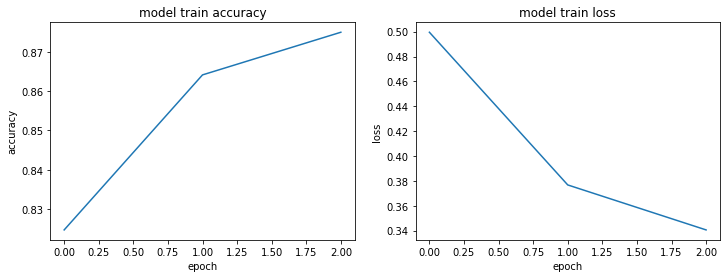

In [23]:
print(history.history.keys())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#  "Accuracy"
axes[0].plot(history.history['accuracy'])
axes[0].set_title('model train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')

# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('model train loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch');

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Better test accuracy => better generalization.
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3685 - accuracy: 0.8645

Test accuracy: 0.8644999861717224


### Build Model Again

- Deep Learning is an iterative process.
- Try different hyperparameters.
- Analyze the model.

In [ ]:
## [TODO]:: Try different values for the following and analyze the model:
##    1. Number of layers
##    2. Number of perceptrons in each layer
##    3. Activation Functions for each layer
##    4. Optimizer
##    5. Loss function


## Some commonly used optimizers:
##   1. Adam
##   2. RMSProp
##   3. SGD (Stochastic Gradient Descent)

## https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

## Some commonly used loss functions:
##   1. Binary Cross Entropy (Binary Classification)
##   2. Categorical Cross Entropy (Multiclass Classification, One hot encoded labels)
##   3. Sparse Categorical Cross Entropy (Multiclass classification, Integer Labels)
##   4. Mean Squared Error (Regression)
##   5. Mean Absolute Error (Regression)

## https://www.tensorflow.org/api_docs/python/tf/keras/losses

## Some commonly used activation functions:
##   1. Relu
##   2. Sigmoid
##   3. Tanh
##   4. Softmax (mostly used for the output layer of classification)

## https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [30]:
## 1. Defining the model.

model = tf.keras.Sequential([
    ## Flatten the input image from 2D into 1D. (Input Layer)
    ## Input shape based on the dataset image.
    ## All images must be of same shape!!!
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    ## Hidden Layer
    tf.keras.layers.Dense(128, activation='relu'),
    ## Output layer --- size = number of classes = 10
    ## Softmax activation function gives the probability of each class
    tf.keras.layers.Dense(10, activation='softmax')
])

## Activation function is a non linear function which is applied to each layer in the network.

# model.summary()

## 2. Compile the model.

model.compile(optimizer='RMSProp',  # Optimizer --- an algorithm which tries to learn weights of the network.
              # Loss --- measures the error in prediction.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # Metric --- calculates how good the model is performing.
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Better test accuracy => better generalization.
print('\nTest accuracy:', test_acc)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6443 - accuracy: 0.7724
Epoch 2/3
1875/1875 [==============================] - 2s 990us/step - loss: 0.3855 - accuracy: 0.8606
Epoch 3/3
1875/1875 [==============================] - 2s 993us/step - loss: 0.3484 - accuracy: 0.8761
313/313 - 0s - loss: 0.3849 - accuracy: 0.8710

Test accuracy: 0.8709999918937683


In [56]:
## 1. Defining the model.

model = tf.keras.Sequential([
    ## Flatten the input image from 2D into 1D. (Input Layer)
    ## Input shape based on the dataset image.
    ## All images must be of same shape!!!
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    ## Hidden Layer
    tf.keras.layers.Dense(128, activation='relu'),
    ## Output layer --- size = number of classes = 10
    ## Softmax activation function gives the probability of each class
    tf.keras.layers.Dense(20, activation='softmax')
])

## Activation function is a non linear function which is applied to each layer in the network.

# model.summary()

## 2. Compile the model.

model.compile(optimizer='RMSProp',  # Optimizer --- an algorithm which tries to learn weights of the network.
              # Loss --- measures the error in prediction.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # Metric --- calculates how good the model is performing.
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

## Better test accuracy => better generalization.
print('\nTest accuracy:', test_acc)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6457 - accuracy: 0.7765
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3856 - accuracy: 0.8588
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3467 - accuracy: 0.8755

Test accuracy: 0.8651000261306763


In [78]:
def train_model(hidden,output,optimizer_tech,epo):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=hidden),
        tf.keras.layers.Dense(10, activation=output)
    ])
    model.compile(optimizer=optimizer_tech,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epo)

    train_loss,train_acc= model.evaluate(train_images,  train_labels, verbose=2)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#     print('\nTrain accuracy:', train_acc)
#     print('Test accuracy:', test_acc)
    tup=(hidden,output,optimizer_tech)
#     print('\n',tup,'\n')
    return (train_acc,test_acc,tup)

In [79]:
loss_fn=['relu','sigmoid','tanh','softmax']
optimizers=['Adam','RMSProp']
x=train_model('sigmoid','softmax','Adam',1)
x

1875/1875 [==============================] - 2s 758us/step - loss: 0.7296 - accuracy: 0.7620
1875/1875 - 1s - loss: 0.4273 - accuracy: 0.8447
313/313 - 1s - loss: 0.4644 - accuracy: 0.8280


(0.8447166681289673, 0.828000009059906, ('sigmoid', 'softmax', 'Adam'))

In [86]:
values=[]

In [ ]:

for i in loss_fn:
    for j in loss_fn:
        for k in optimizers:
            values.append(train_model(i,j,k,2))
        
# train_model('relu','softmax','RMSProp',2)
print('\n\n\n')
print(values)

In [88]:
values

[(0.10000000149011612, 0.10000000149011612, ('relu', 'relu', 'Adam')),
 (0.14264999330043793, 0.14380000531673431, ('relu', 'relu', 'RMSProp')),
 (0.8756666779518127, 0.8575999736785889, ('relu', 'sigmoid', 'Adam')),
 (0.8805999755859375, 0.8611999750137329, ('relu', 'sigmoid', 'RMSProp')),
 (0.21709999442100525, 0.2184000015258789, ('relu', 'tanh', 'Adam')),
 (0.101133331656456, 0.10440000146627426, ('relu', 'tanh', 'RMSProp')),
 (0.8786333203315735, 0.8618999719619751, ('relu', 'softmax', 'Adam')),
 (0.8696833252906799, 0.8532999753952026, ('relu', 'softmax', 'RMSProp')),
 (0.10001666843891144, 0.10000000149011612, ('sigmoid', 'relu', 'Adam')),
 (0.10613333433866501, 0.1071000024676323, ('sigmoid', 'relu', 'RMSProp')),
 (0.8714666962623596, 0.8561999797821045, ('sigmoid', 'sigmoid', 'Adam')),
 (0.868399977684021, 0.8511999845504761, ('sigmoid', 'sigmoid', 'RMSProp')),
 (0.09688333421945572, 0.09780000150203705, ('sigmoid', 'tanh', 'Adam')),
 (0.14401666820049286, 0.1428000032901764, 

In [92]:
best_val=[(0.8756666779518127, 0.8575999736785889, ('relu', 'sigmoid', 'Adam')),
 (0.8805999755859375, 0.8611999750137329, ('relu', 'sigmoid', 'RMSProp')),
(0.8786333203315735, 0.8618999719619751, ('relu', 'softmax', 'Adam')),
 (0.8696833252906799, 0.8532999753952026, ('relu', 'softmax', 'RMSProp')),
(0.8714666962623596, 0.8561999797821045, ('sigmoid', 'sigmoid', 'Adam')),
 (0.868399977684021, 0.8511999845504761, ('sigmoid', 'sigmoid', 'RMSProp')),
(0.8737666606903076, 0.8575999736785889, ('sigmoid', 'softmax', 'Adam')),
 (0.8710833191871643, 0.8557000160217285, ('sigmoid', 'softmax', 'RMSProp')),
(0.8718166947364807, 0.8536999821662903, ('tanh', 'sigmoid', 'Adam')),
(0.8753166794776917, 0.8589000105857849, ('tanh', 'softmax', 'Adam')),
 (0.878849983215332, 0.8611000180244446, ('tanh', 'softmax', 'RMSProp'))]
refined_val=[]

In [103]:
for val in best_val:
    i,j,k=val[2][0],val[2][1],val[2][2]
    refined_val.append(train_model(i,j,k,3))

Epoch 1/3
1875/1875 [==============================] - 2s 814us/step - loss: 0.6320 - accuracy: 0.7828
Epoch 2/3
1875/1875 [==============================] - 2s 820us/step - loss: 0.3847 - accuracy: 0.8623
Epoch 3/3
1875/1875 [==============================] - 2s 913us/step - loss: 0.3438 - accuracy: 0.8762
1875/1875 - 1s - loss: 0.3138 - accuracy: 0.8837
313/313 - 0s - loss: 0.3779 - accuracy: 0.8618
Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6365 - accuracy: 0.7765
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3799 - accuracy: 0.8618
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3422 - accuracy: 0.8778
1875/1875 - 2s - loss: 0.3208 - accuracy: 0.8877
313/313 - 0s - loss: 0.3916 - accuracy: 0.8665
Epoch 1/3
1875/1875 [==============================] - 2s 826us/step - loss: 0.6322 - accuracy: 0.7774
Epoch 2/3
1875/1875 [==============================] - 2s 820us/step - loss: 0.3821 - accurac

In [94]:
refined_val

[(0.8803499937057495, 0.8607000112533569, ('relu', 'sigmoid', 'Adam')),
 (0.8910166621208191, 0.8690000176429749, ('relu', 'sigmoid', 'RMSProp')),
 (0.889549970626831, 0.8676000237464905, ('relu', 'softmax', 'Adam')),
 (0.886650025844574, 0.8659999966621399, ('relu', 'softmax', 'RMSProp')),
 (0.8801166415214539, 0.8654000163078308, ('sigmoid', 'sigmoid', 'Adam')),
 (0.8828833103179932, 0.8636999726295471, ('sigmoid', 'sigmoid', 'RMSProp')),
 (0.8800666928291321, 0.8605999946594238, ('sigmoid', 'softmax', 'Adam')),
 (0.8765333294868469, 0.8586999773979187, ('sigmoid', 'softmax', 'RMSProp')),
 (0.8862000107765198, 0.8661999702453613, ('tanh', 'sigmoid', 'Adam')),
 (0.8774833083152771, 0.8568000197410583, ('tanh', 'softmax', 'Adam')),
 (0.8912166953086853, 0.8707000017166138, ('tanh', 'softmax', 'RMSProp'))]

In [108]:
refined_val_3=refined_val[6:]
refined_val_3

[(0.8837166428565979, 0.8618000149726868, ('relu', 'sigmoid', 'Adam')),
 (0.887666642665863, 0.8665000200271606, ('relu', 'sigmoid', 'RMSProp')),
 (0.8787500262260437, 0.8582000136375427, ('relu', 'softmax', 'Adam')),
 (0.8799999952316284, 0.8611000180244446, ('relu', 'softmax', 'RMSProp')),
 (0.8779833316802979, 0.8618999719619751, ('sigmoid', 'sigmoid', 'Adam')),
 (0.8800666928291321, 0.8623999953269958, ('sigmoid', 'sigmoid', 'RMSProp')),
 (0.8774999976158142, 0.859499990940094, ('sigmoid', 'softmax', 'Adam')),
 (0.8761166930198669, 0.8600999712944031, ('sigmoid', 'softmax', 'RMSProp')),
 (0.8881000280380249, 0.8676999807357788, ('tanh', 'sigmoid', 'Adam')),
 (0.8824333548545837, 0.8636000156402588, ('tanh', 'softmax', 'Adam')),
 (0.8777499794960022, 0.8539999723434448, ('tanh', 'softmax', 'RMSProp'))]

In [109]:
# ('relu', 'sigmoid', 'RMSProp') and ('tanh', 'sigmoid', 'Adam') show best consistent accuracy
train_model('relu', 'sigmoid', 'RMSProp',5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6289 - accuracy: 0.7755
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3876 - accuracy: 0.8618
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3470 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3243 - accuracy: 0.8833
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3079 - accuracy: 0.8921
1875/1875 - 1s - loss: 0.2891 - accuracy: 0.8963
313/313 - 0s - loss: 0.3852 - accuracy: 0.8750


(0.8963333368301392, 0.875, ('relu', 'sigmoid', 'RMSProp'))

In [115]:
# Tweaking layers

def train_model2(hidden_layers,output_layers,epo):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(hidden_layers, activation='relu'),
        tf.keras.layers.Dense(output_layers, activation='sigmoid')
    ])
    model.compile(optimizer='RMSProp',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epo)

    train_loss,train_acc= model.evaluate(train_images,  train_labels, verbose=2)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#     print('\nTrain accuracy:', train_acc)
#     print('Test accuracy:', test_acc)
    tup=(hidden_layers,output_layers)
#     print('\n',tup,'\n')
    return (train_acc,test_acc,tup)

In [129]:
train_model2(256,10,10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6343 - accuracy: 0.7770
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3790 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3494 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3313 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3174 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2984 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.9023
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2869 - accuracy: 0.9048
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.284

(0.9148666858673096, 0.8787999749183655, (256, 10))

In [128]:
train_model2(256,10,7)

Epoch 1/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6385 - accuracy: 0.7747
Epoch 2/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3826 - accuracy: 0.8627
Epoch 3/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3423 - accuracy: 0.8785
Epoch 4/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3327 - accuracy: 0.8835
Epoch 5/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3216 - accuracy: 0.8885
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.8946
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2991 - accuracy: 0.8986
1875/1875 - 1s - loss: 0.2940 - accuracy: 0.9044
313/313 - 0s - loss: 0.4415 - accuracy: 0.8780


(0.9043833613395691, 0.878000020980835, (256, 10))

In [132]:
#('tanh', 'sigmoid', 'Adam')
# Tweaking layers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=7)

train_loss,train_acc= model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTrain accuracy:', train_acc)
print('Test accuracy:', test_acc)

Epoch 1/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5824 - accuracy: 0.7929
Epoch 2/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3707 - accuracy: 0.8670
Epoch 3/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3344 - accuracy: 0.8764
Epoch 4/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3107 - accuracy: 0.8844
Epoch 5/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2921 - accuracy: 0.8924
Epoch 6/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2714 - accuracy: 0.9001
Epoch 7/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2633 - accuracy: 0.9023
1875/1875 - 1s - loss: 0.2403 - accuracy: 0.9123
313/313 - 0s - loss: 0.3323 - accuracy: 0.8812

Train accuracy: 0.9123499989509583
Test accuracy: 0.8812000155448914


In [133]:
#('tanh', 'sigmoid', 'Adam')
# Tweaking hidden layers from 128 to 256

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10)

train_loss,train_acc= model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTrain accuracy:', train_acc)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5630 - accuracy: 0.7972
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3751 - accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3362 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3107 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2933 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2643 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2555 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2453 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.236

### Making Predictions

In [134]:
img = test_images[0]

# Throws error!!
# model.predict(img)
print("Model expects the input to be of shape: ", model.input.shape)
print("Shape of our input: ", img.shape)

# Adding an extra dimension.
img = img[np.newaxis, :, :]
print("Shape of our input after adding another dim: ", img.shape)

# Returns probability of each class
print("\nPredicted probabilities:\n", model.predict(img))

# Returns the predicted class
print("\nPredicted class: ", model.predict(img).argmax(axis=1))

print("Actual class: ", test_labels[0])

Model expects the input to be of shape:  (None, 28, 28)
Shape of our input:  (28, 28)
Shape of our input after adding another dim:  (1, 28, 28)

Predicted probabilities:
 [[0.00666887 0.01923275 0.00865585 0.32888865 0.09176141 0.9994693
  0.23525473 0.99967337 0.2890043  0.9999688 ]]

Predicted class:  [9]
Actual class:  9
